In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
transform=transforms.ToTensor()


In [109]:
pwd

'C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning\\03-CNN-Convolutional-Neural-Networks'

In [110]:
train_data = datasets.CIFAR10(root='C:\\Users\\SEEMA YADAV\\Desktop', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='C:\\Users\\SEEMA YADAV\\Desktop', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [111]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:\Users\SEEMA YADAV\Desktop
    Split: Train
    StandardTransform
Transform: ToTensor()

In [112]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: C:\Users\SEEMA YADAV\Desktop
    Split: Test
    StandardTransform
Transform: ToTensor()

In [130]:
 torch.manual_seed(101)
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [131]:
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [115]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [116]:
for train_data,test_data in train_loader:
    break

In [117]:
train_data[0].size()

torch.Size([3, 32, 32])

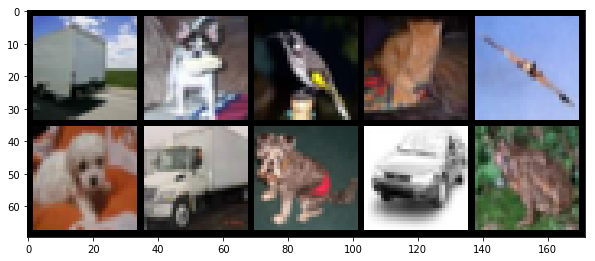

In [118]:
im=make_grid(train_data,nrow=5)
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [119]:
im.size()

torch.Size([3, 70, 172])

In [120]:
class conv_net_real_image(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(16*6*6,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x=x.view(-1,16*6*6)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return F.log_softmax(x,dim=1)

In [121]:
 torch.manual_seed(101)
model = conv_net_real_image()
model

conv_net_real_image(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [122]:
x=0
for param in model.parameters():
    print(param.numel())
    x+=param.numel()
print('-------------')
print(x)

162
6
864
16
69120
120
10080
84
840
10
-------------
81302


In [123]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [124]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
     
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.66354203  accuracy:  25.540%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 2.07144094  accuracy:  31.435%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.27783990  accuracy:  35.350%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.19341302  accuracy:  37.947%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 1.38702762  accuracy:  39.718%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.47534013  accuracy:  49.880%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.03374696  accuracy:  50.840%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 2.08648396  accuracy:  51.437%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.02278352  accuracy:  51.773%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 0.85152513  accuracy:  52.298%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.29422009  accuracy:  56.510%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 1.25924325  accuracy:  56.890%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 1.21842301  accuracy:  56.740%
epoch:  2  b

In [125]:
torch.save(model.state_dict(),'CIFAR-10-CNN-Model.pt')

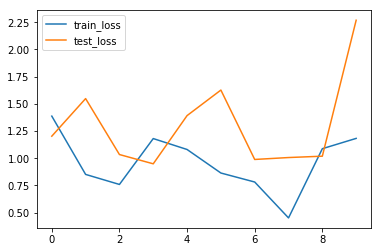

In [126]:
plt.plot(range(epochs),train_losses,label='train_loss')
plt.plot(range(epochs),test_losses,label='test_loss')
plt.legend()

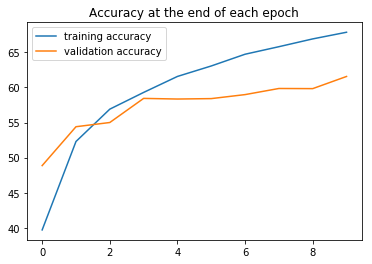

In [127]:
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [133]:
#test_load_all=DataLoader(test_data,batch_size=10000,shuffle=False)
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(4887), tensor(5440), tensor(5500), tensor(5843), tensor(5834), tensor(5840), tensor(5897), tensor(5984), tensor(5982), tensor(6155)]

Test accuracy: 61.550%


In [143]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [145]:
# Create a loader for the entire the test set
#test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model.forward(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(predicted.view(-1),y_test.view(-1))
#df_cm = pd.DataFrame(arr, class_names, class_names)
#plt.figure(figsize = (9,6))
#sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
#plt.xlabel("prediction")
#plt.ylabel("label (ground truth)")
#plt.show();
print(arr)

ValueError: too many values to unpack (expected 2)

In [99]:
arr

array([[0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [105]:
for (X_test, y_test) in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()


In [106]:
correct

tensor(1998)

In [140]:
for X,y in test_load_all:
    break

ValueError: too many values to unpack (expected 2)